# Julia-MELTS interface demo

This notebook runs the <a href="https://github.com/brenhinkeller/StatGeochem.jl" target="_blank">StatGeochem.jl</a> package, which implements an interface for interacting with MELTS from the <a href="https://julialang.org" target="_blank">Julia programming language</a>, including from Jupyter notebooks such as this.

StatGeochem.jl also includes some of the codes and utilities used in <a href="https://doi.org/10.1038/nature11024" target="_blank">Keller & Schoene 2012</a>, <a href="https://doi.org/10.1038/nature14584" target="_blank">Keller et al. 2015</a> and <a href="https://doi.org/10.1016/j.epsl.2017.10.031" target="_blank">Keller & Schoene 2018</a>.

<a href="https://mybinder.org/v2/gh/brenhinkeller/StatGeochem.jl/main?filepath=examples%2FMeltsExamples.ipynb" target="_blank"><img src="https://mybinder.org/badge_logo.svg" alt="Launch Binder notebook" align="left"></a> 
<p style="text-indent: 5px">If running this notebook as an online Binder notebook and the webpage times out, click the badge at left to relaunch (refreshing will not work). Note that any changes will be lost!</p>

Hint: `shift`-`enter` to run a single cell, or from the `Cell` menu select `Run All` to run the whole file. Any code from this notebook can be copied and pasted into the Julia REPL or a `.jl` script.
***
### Load required Julia packages

In [1]:
## --- Load the StatGeochem package
using StatGeochem
using Plots

### AlphaMELTS calculations
#### Try to download and install alphaMELTS

In [2]:
# Download precompiled executable from caltech
alphameltsversion = "linux_alphamelts_1-9"
download("https://magmasource.caltech.edu/alphamelts/zipfiles/$alphameltsversion.zip","./$alphameltsversion.zip")
run(`unzip -o $alphameltsversion.zip`);
run(`mv $alphameltsversion/alphamelts_linux64 $alphameltsversion/alphamelts`);

# The absolute path to the alphamelts perl script must be input here:
# meltspath = "/usr/local/bin/run_alphamelts.command"
meltspath = abspath("$alphameltsversion/run_alphamelts.command");

# The absolute or relative path to a direcory where you want to run MELTS -
# A number of configuration and output files will be written here.
scratchdir = "scratch/";

#### Run alphamelts

In [3]:
## --- # # # # # # # # # # # pMelts equil. batch melting # # # # # # # # # # # #

# Conditions
P_range = [20000,20000]
T_range = [1700,800]
# Starting composition
elements = ["SiO2",  "TiO2","Al2O3","Fe2O3","Cr2O3",  "FeO",  "MnO",  "MgO",   "NiO",  "CoO",  "CaO",  "Na2O", "K2O", "P2O5", "H2O",]
composition=[44.8030, 0.1991, 4.4305, 0.9778, 0.3823, 7.1350, 0.1344, 37.6345, 0.2489, 0.0129, 3.5345, 0.3584, 0.0289, 0.0209, 0.15,] #mcdbse (McDonough Pyrolite)
# Run simulation
melts_configure(meltspath, scratchdir, composition, elements, T_range, P_range,
    batchstring="1\nsc.melts\n10\n1\n3\n1\nliquid\n1\n1.0\n0\n10\n0\n4\n0\n",
    dT=-10, dP=0, index=1, version="pMELTS",mode="isobaric",fo2path="FMQ")

# Read results
melt_comp = melts_query_liquid(scratchdir, index=1)
solid_comp = melts_query_solid(scratchdir, index=1)
modes = melts_query_modes(scratchdir, index=1)

ALPHAMELTS_VERSION pMELTS
ALPHAMELTS_CELSIUS_OUTPUT true
ALPHAMELTS_MINT 800.0
ALPHAMELTS_MINP 2.0
ALPHAMELTS_DELTAP 0.0
ALPHAMELTS_DELTAT -10.0
ALPHAMELTS_MAXP 90000.0
ALPHAMELTS_MODE isobaric
ALPHAMELTS_MAXT 3000.0
Checking for updates...


*** alphaMELTS 1.2 -- pMELTS isobar w/ or w/o liquid ***

This front end is the work of Paul Asimow and Paula Antoshechkina
(nee Smith) and it uses the MELTS and pMELTS algorithms developed by
Mark Ghiorso & co-workers. You are welcome to use and distribute this
program, under the condition that you acknowledge all the contributors
by citing the appropriate references with any results:

Smith & Asimow (2005) -- front end
Ghiorso et al (2002) -- pMELTS thermodynamic model
Asimow & Ghiorso (1998) -- subsolidus calculations (if used)

There may be others, depending on the exact calculation performed
and the source and / or partition coefficients (e.g. D(P,T,X)) used.
See Smith & Asimow (2005), documentation and the forum for details.

Unable to autom

Dict{String, Union{Vector{Float64}, Vector{String}}} with 14 entries:
  "Temperature"     => [1624.07, 1614.07, 1604.07, 1594.07, 1584.07, 1574.07, 1…
  "water"           => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.…
  "orthopyroxene_0" => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.96064, 11.4105, 14.2824…
  "elements"        => ["Pressure", "Temperature", "mass", "liquid_0", "olivine…
  "clinopyroxene_0" => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  11…
  "mass"            => [99.9575, 99.9544, 99.9515, 99.949, 99.9467, 99.9445, 99…
  "olivine_0"       => [0.0, 8.88223, 16.6072, 23.3962, 29.1114, 33.9796, 36.01…
  "hornblende_0"    => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  3.…
  "garnet_0"        => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  11…
  "spinel_0"        => [0.0, 0.0, 0.0, 0.134547, 0.235384, 0.321473, 0.464989, …
  "liquid_0"        => [99.9575, 91.0722, 83.3443, 76.4183, 70.5999, 65.6434, 5…
  "apatite"         => [0.0, 0.0, 0.0, 

#### Plot results

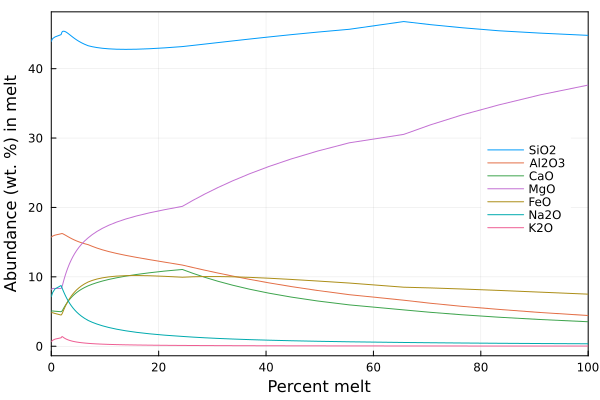

In [4]:
## --- Plot melt composition
melt_comp = melts_query_liquid(scratchdir, index=1)

h = plot(xlabel="Percent melt",ylabel="Abundance (wt. %) in melt")
for e in ["SiO2","Al2O3","CaO","MgO","FeO","Na2O","K2O"]
    plot!(h,melt_comp["mass"],melt_comp[e],label=e)
end
plot!(h,xlims=(0,100),framestyle=:box,fg_color_legend=:white,legend=:right)

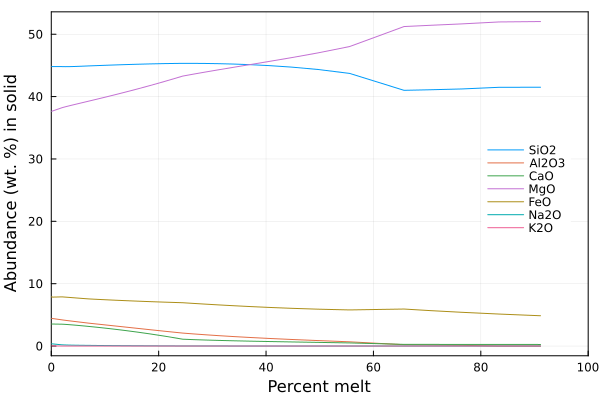

In [5]:
## --- Plot solid composition
solid_comp = melts_query_solid(scratchdir, index=1)

h = plot(xlabel="Percent melt",ylabel="Abundance (wt. %) in solid")
for e in ["SiO2","Al2O3","CaO","MgO","FeO","Na2O","K2O"]
    plot!(h,100 .- solid_comp["mass"],solid_comp[e],label=e)
end
plot!(h,xlims=(0,100),framestyle=:box,fg_color_legend=:white,legend=:right)

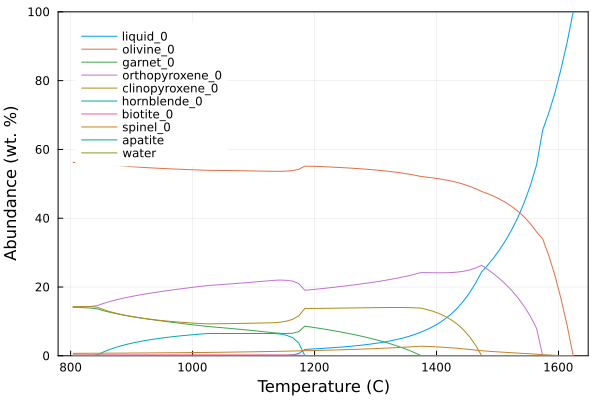

In [6]:
## --- Plot phase modes
modes = melts_query_modes(scratchdir, index=1)

h = plot(xlabel="Temperature (C)",ylabel="Abundance (wt. %)")
for m in modes["elements"][4:end]
    plot!(h,modes["Temperature"],modes[m],label=m)
end
plot!(h,ylims=(0,100),framestyle=:box,fg_color_legend=:white,legend=:topleft)